In [1]:
%clear
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import dmrg, pyalps

In [3]:
import pyalps.plot
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.colorbar as colorbar
from IPython.display import display, HTML 

In [18]:
def plot_local_measurement(d, matrixel, lims):
    y = matrixel * d.y[0]
    yamax = max(np.abs(lims))
    yamin = min(np.abs(lims))
    
    plt.figure(figsize=(10,2))
    ax = plt.subplot(111)
    
    cm = plt.get_cmap('Oranges_r') if max(y) < 0 else plt.get_cmap('Oranges')
    cNorm  = colors.Normalize(vmin=lims[0], vmax=lims[1])
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    
    ls = lambda v: 4.*(abs(v)-yamin) / yamax + 1
    for i,xi in enumerate(d.x):
        c = scalarMap.to_rgba(y[i])
        plt.plot(xi[:,0], xi[:,1], c=c, linewidth=ls(y[i]))
        
    
    for xx in xrange(int(d.props['L'])):
        for yy in xrange(2):
            plt.scatter(xx,yy,c=(.1,.1,.1), s=50, zorder=10)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', 'datalim')
    ax.axis('off')
    
    cbaxes = plt.axes([0.3, 0.1, 0.4, 0.1])
    cb1 = colorbar.ColorbarBase(cbaxes, cmap=cm,
                                   norm=cNorm,
                                   orientation='horizontal')
    
    plt.suptitle('%s = %s' % (d.props['observable'], sum(y)))
    plt.show()

def plot_density(d):
    L = int(d.props['L'])
    y = np.sum(d.y[0].reshape(L,2), axis=1)
    x = np.arange(len(y))
    
    plt.figure(figsize=(10,3))
    plt.plot(x,y, '-x')
    plt.xlabel('rung i')
    plt.ylabel('Local density')
    plt.grid()
    plt.show()
    
def analyze(data):
    for d in pyalps.flatten(data):
        if d.props['observable'] == 'Energy':
            print 'Energy = ', d.y[0]
        if d.props['observable'] == 'exchange':
            plot_local_measurement(d, d.props['J'], [-0.3, 0])
        if d.props['observable'] == 'hop':
            plot_local_measurement(d, d.props['t'], [0, 0.25])
        if d.props['observable'] == 'Local density':
            plot_density(d)

# Initial and Full

In [4]:
fname_init = '/Volumes/alps/phys.ethz.ch/dolfim/LatticeMG/manual_runs/corej/L8M800M800/meas.initfull.res.h5'
fname_init_coarse = '/Volumes/alps/phys.ethz.ch/dolfim/LatticeMG/manual_runs/coarse_hamil_tj/L8M200M200/meas.initfull.res.h5'
fname_full = '/Volumes/alps/phys.ethz.ch/dolfim/LatticeMG/manual_runs/corej/L8M800M800/meas.full.res.h5'

data_full = pyalps.loadEigenstateMeasurements([fname_full],
                                                    what=['exchange', 'hop', 'Energy', 'Local density'])
data_init_core = pyalps.loadEigenstateMeasurements([fname_init],
                                                    what=['exchange', 'hop', 'Energy', 'Local density'])
#data_init_coarse = pyalps.loadEigenstateMeasurements([fname_init_coarse],
#                                                    what=['exchange', 'hop', 'Energy'])

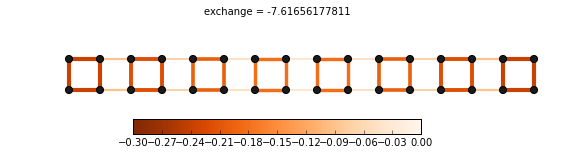

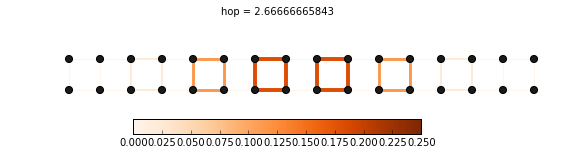

Energy =  -10.2832284365


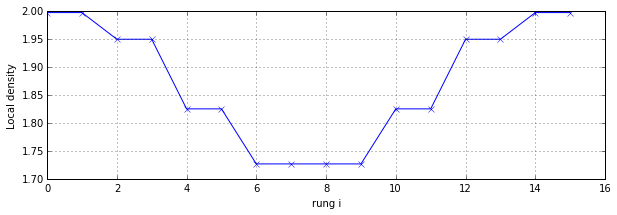

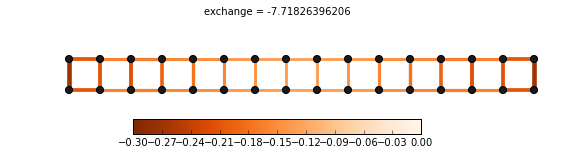

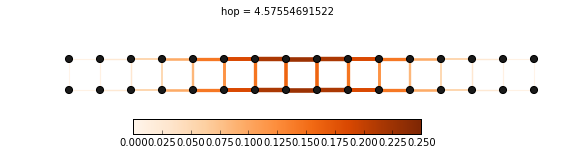

Energy =  -12.2938108773


In [19]:
display(HTML("<h2>Initial state CORE</h2>")) 
analyze(data_init_core)

#display(HTML("<h2>Initial state COARSE</h2>")) 
#analyze(data_init_coarse)

display(HTML("<h2>Full state</h2>")) 
analyze(data_full)

# Odd number of plaquettes

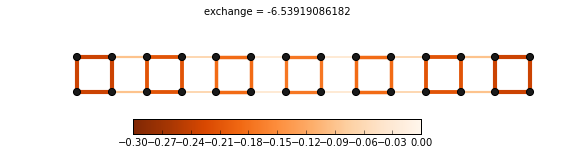

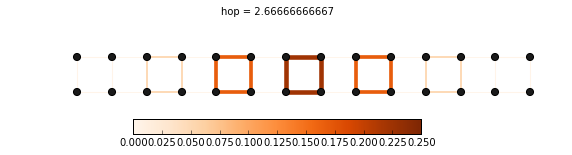

Energy =  -9.20585752849


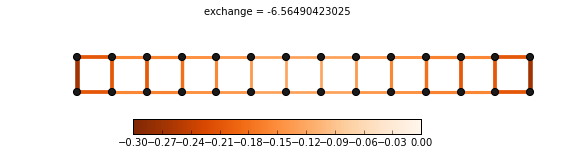

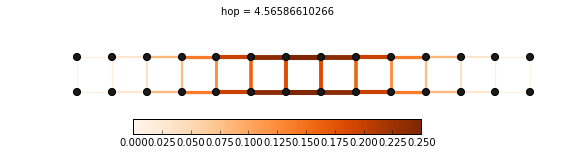

Energy =  -11.1307703329


In [92]:
fname_init = '/Volumes/alps/phys.ethz.ch/dolfim/LatticeMG/manual_runs/corej/L7M400M400/meas.initfull.res.h5'
fname_full = '/Volumes/alps/phys.ethz.ch/dolfim/LatticeMG/manual_runs/corej/L7M400M400/meas.full.res.h5'

data_full = pyalps.loadEigenstateMeasurements([fname_full],
                                                    what=['exchange', 'hop', 'Energy'])
data_init_core = pyalps.loadEigenstateMeasurements([fname_init],
                                                    what=['exchange', 'hop', 'Energy'])

display(HTML("<h2>Initial state CORE</h2>")) 
analyze(data_init_core)

display(HTML("<h2>Full state</h2>")) 
analyze(data_full)

# 8 plaquettes all iterations

Energy =  -10.2832284365


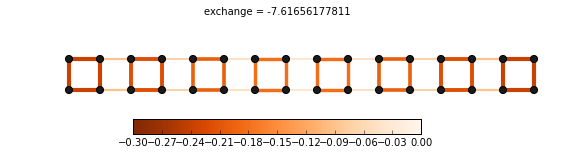

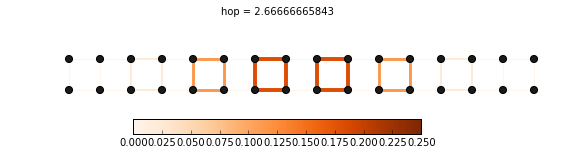

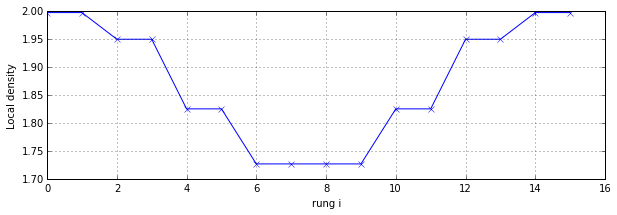

Energy =  -10.2891783722


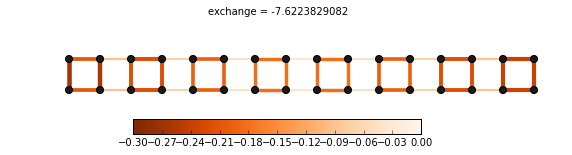

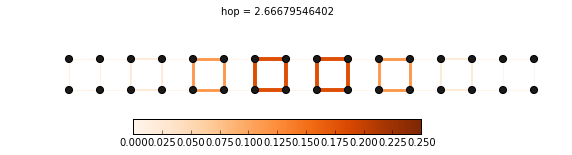

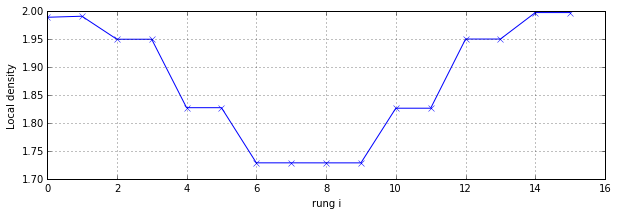

Energy =  -10.4940709122


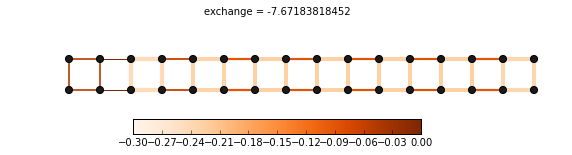

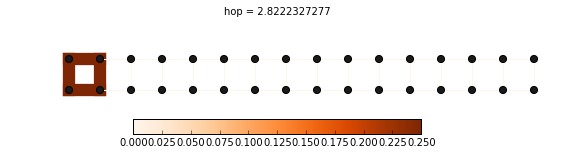

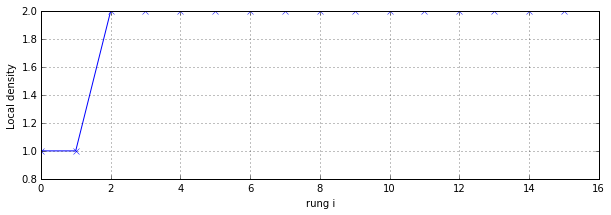

Energy =  -10.4940709122


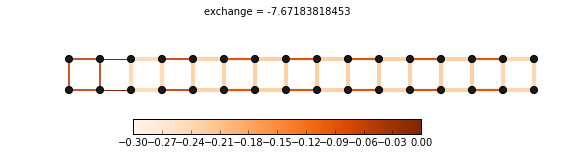

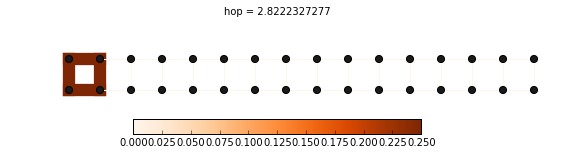

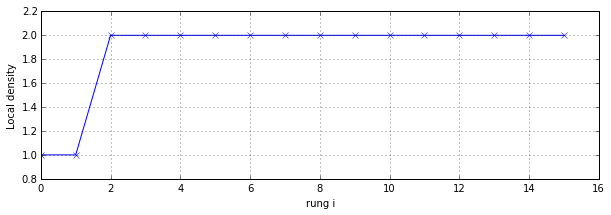

Energy =  -10.7454939789


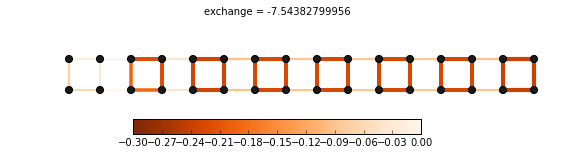

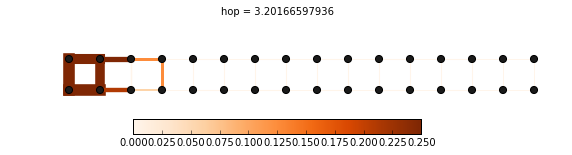

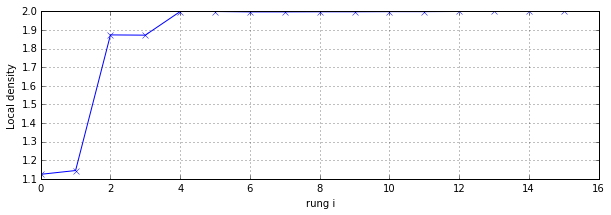

Energy =  -11.0046521856


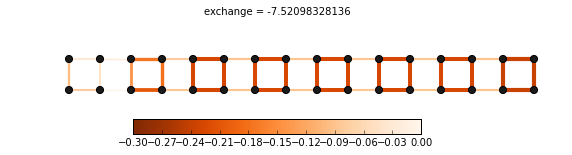

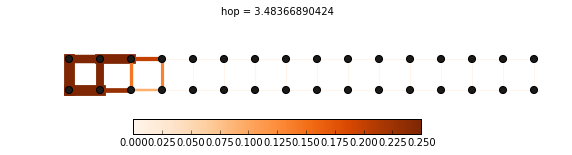

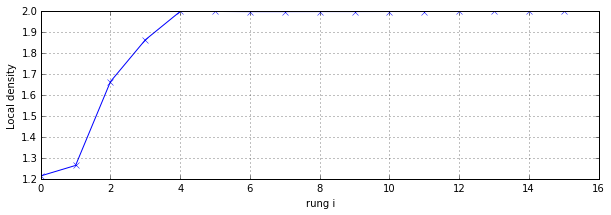

Energy =  -11.0829901338


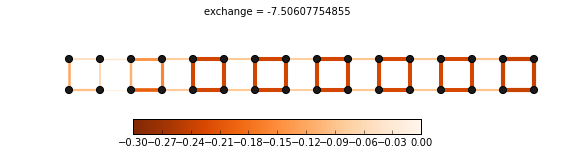

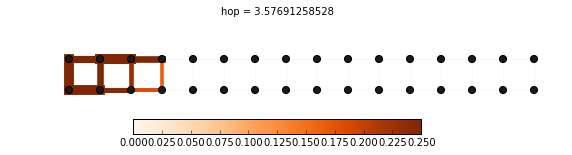

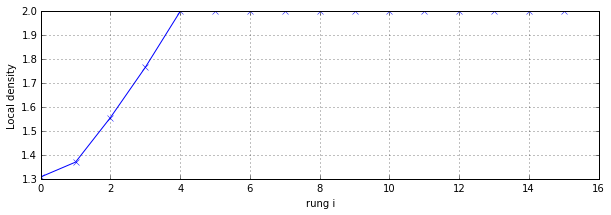

Energy =  -11.0874054196


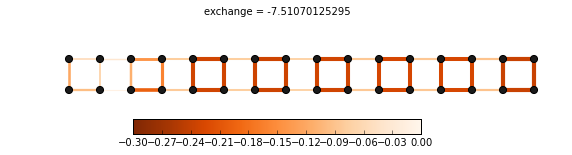

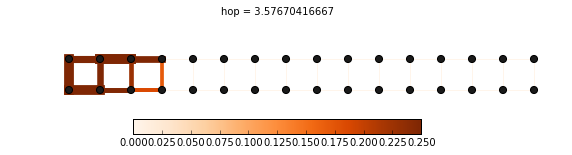

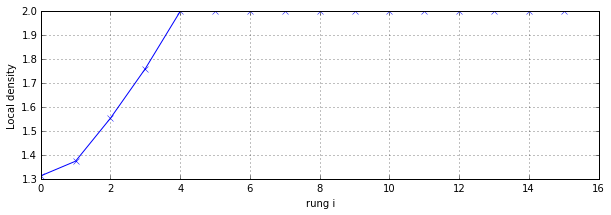

Energy =  -11.1825605133


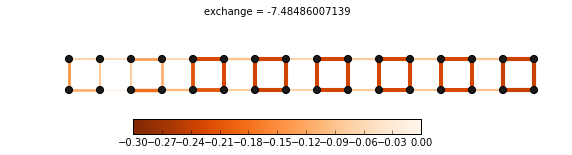

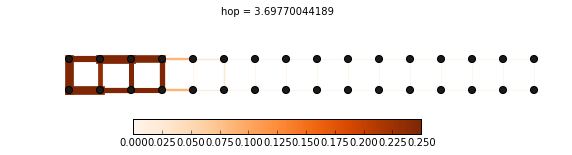

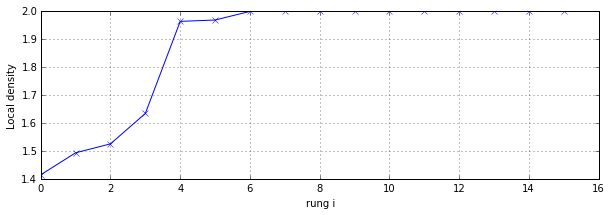

Energy =  -11.307153148


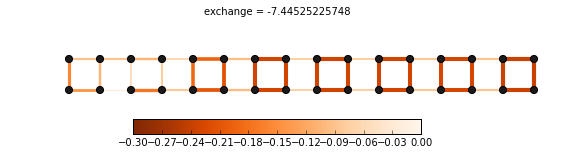

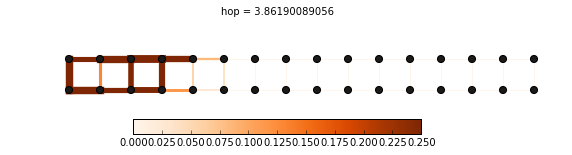

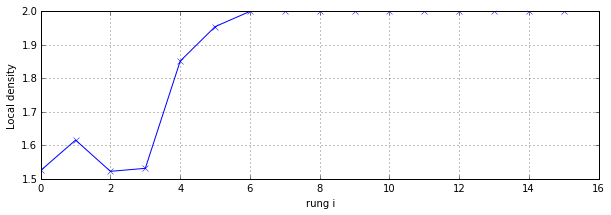

Energy =  -11.3347087755


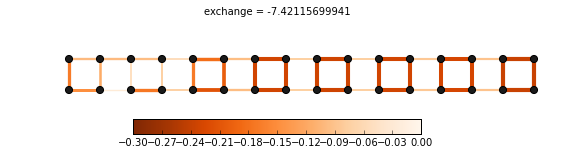

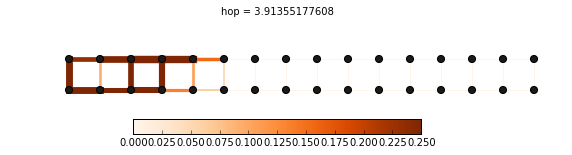

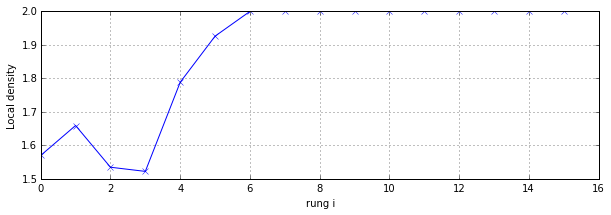

Energy =  -11.3367732157


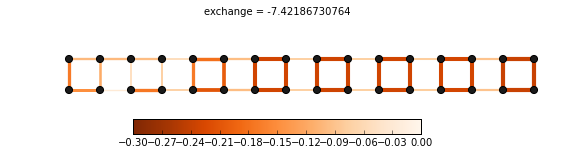

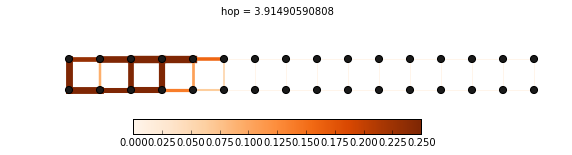

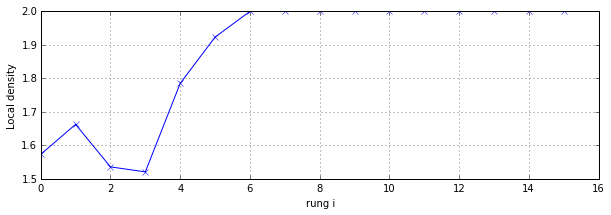

Energy =  -11.3985709477


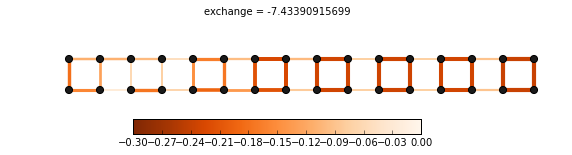

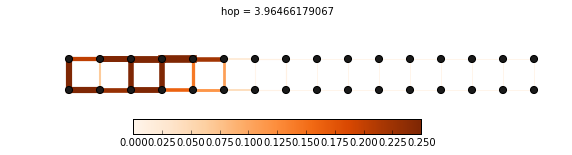

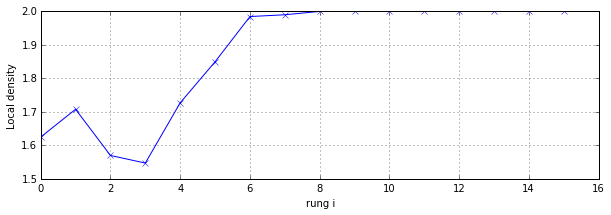

Energy =  -11.4793635699


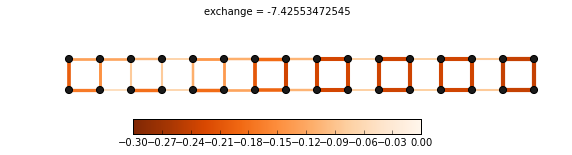

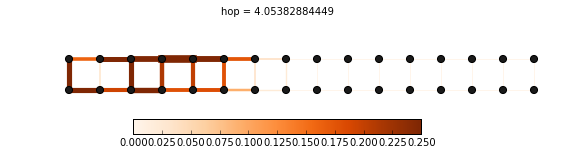

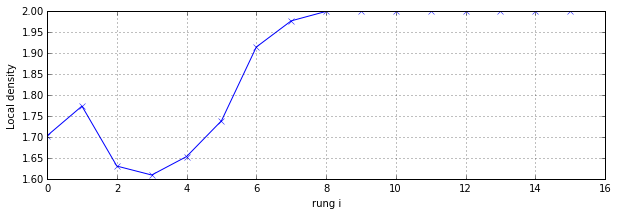

Energy =  -11.5026007085


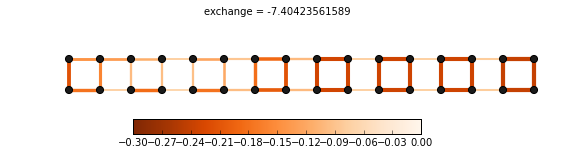

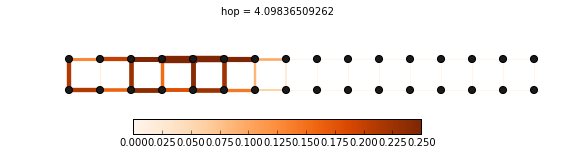

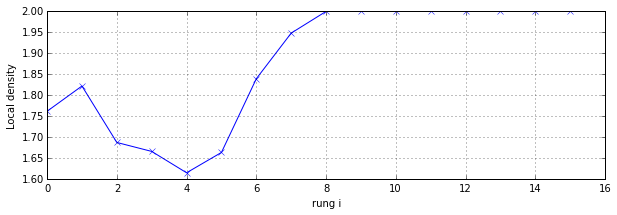

Energy =  -11.5038322794


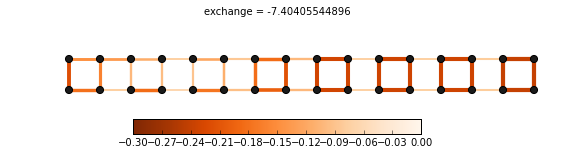

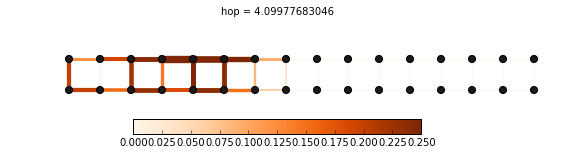

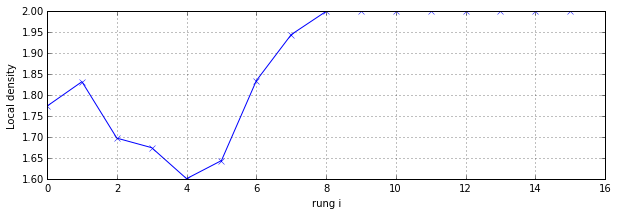

Energy =  -11.5625021371


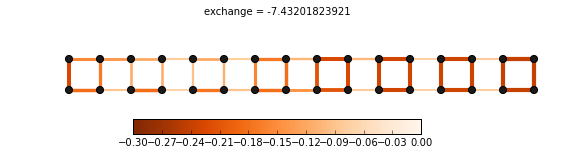

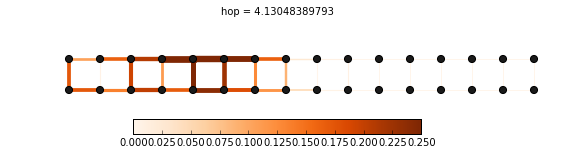

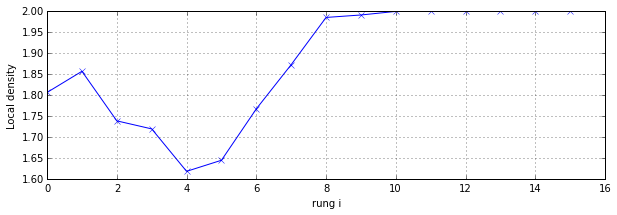

Energy =  -11.6427758937


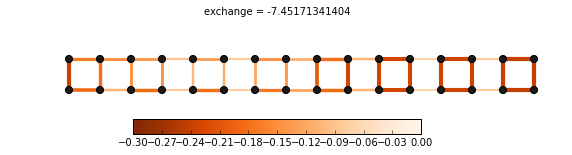

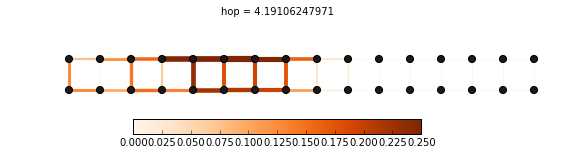

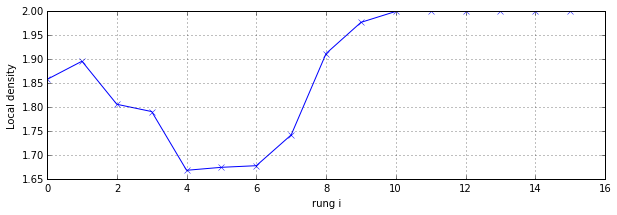

Energy =  -11.6700444266


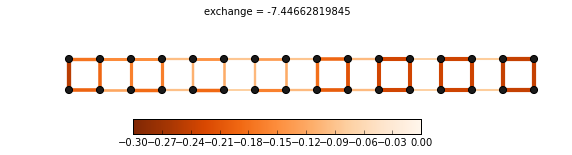

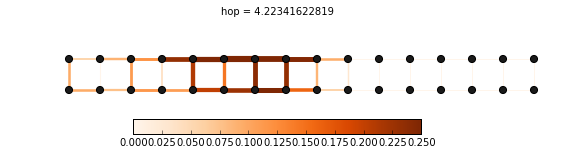

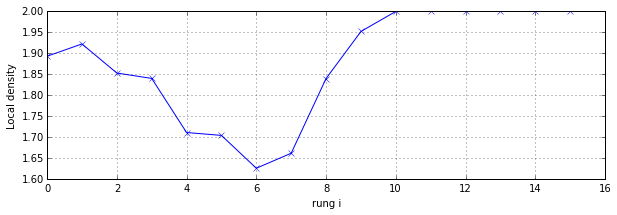

Energy =  -11.6707541122


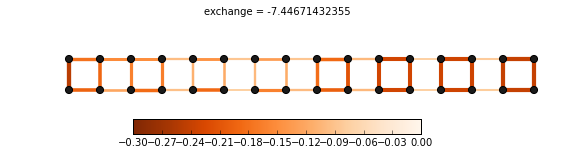

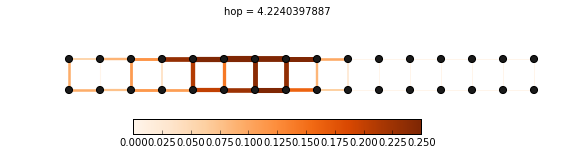

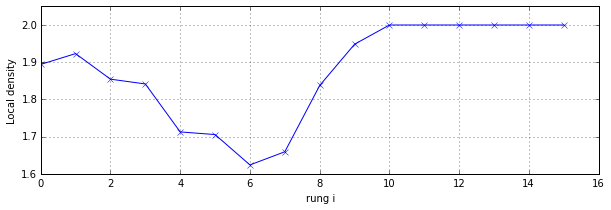

Energy =  -11.7207126947


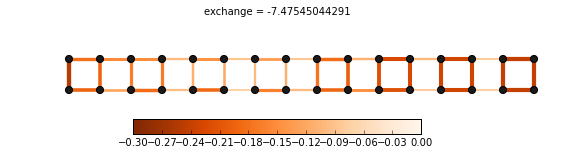

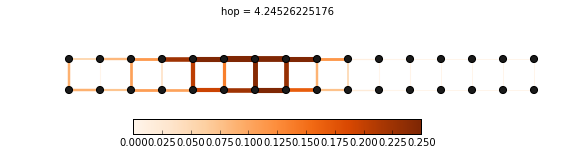

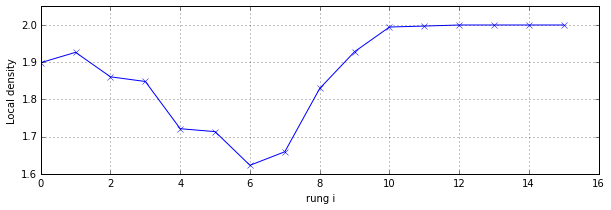

Energy =  -11.7721279826


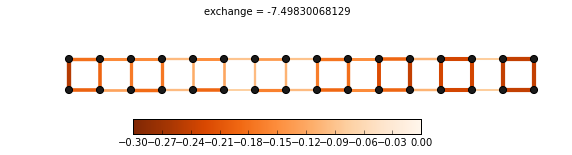

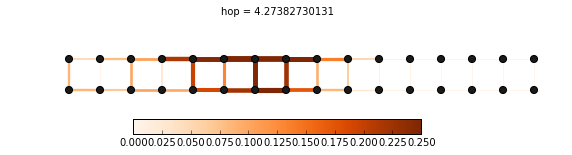

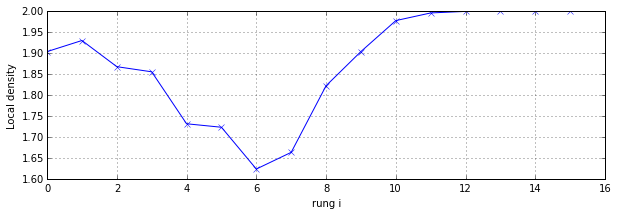

Energy =  -11.7763749661


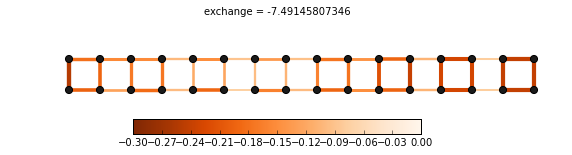

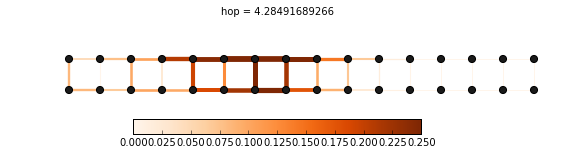

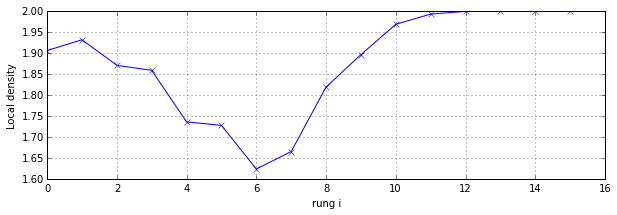

Energy =  -11.7763950561


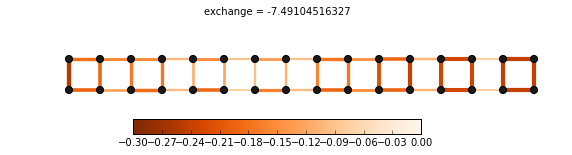

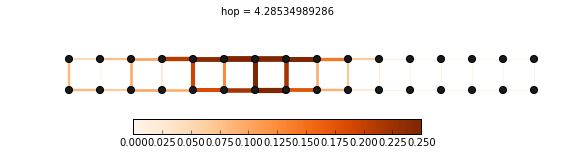

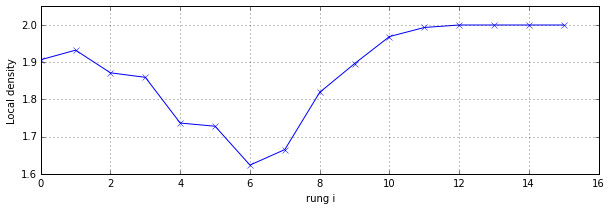

Energy =  -11.8154089998


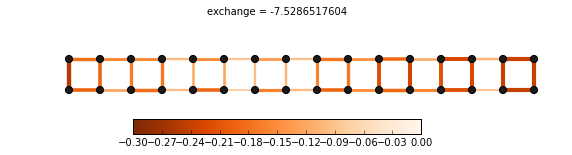

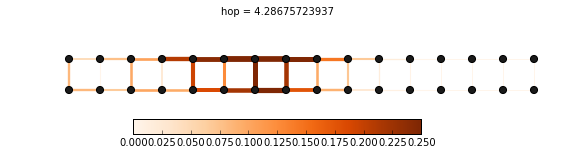

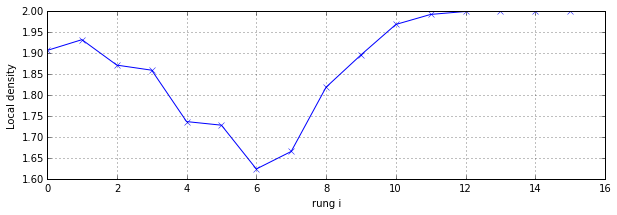

Energy =  -11.8547175624


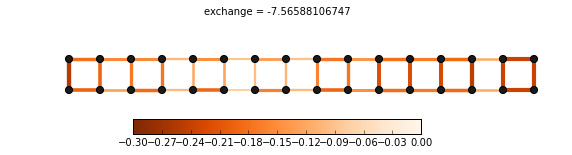

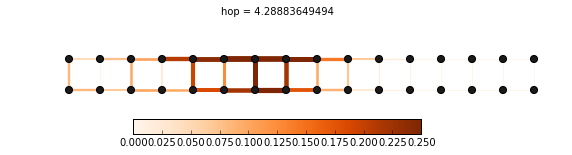

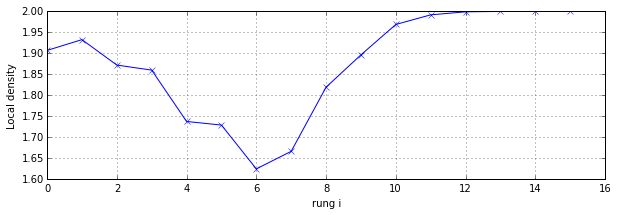

Energy =  -11.854865512


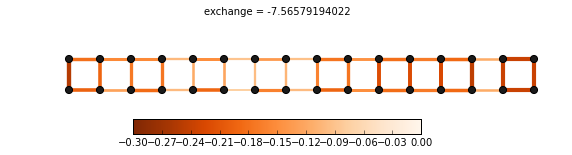

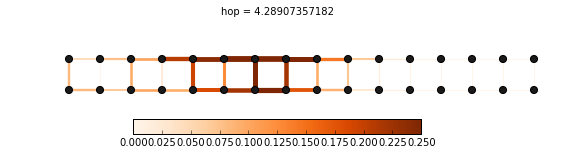

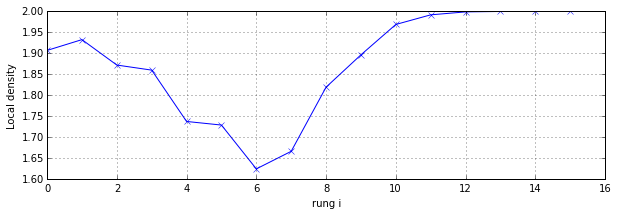

Energy =  -11.8548655149


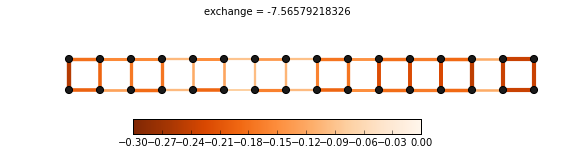

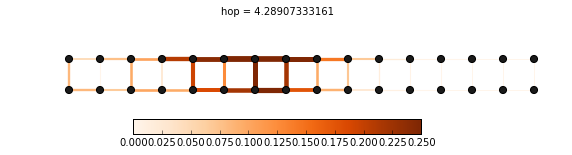

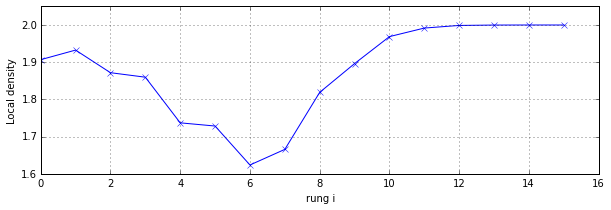

Energy =  -11.8742940702


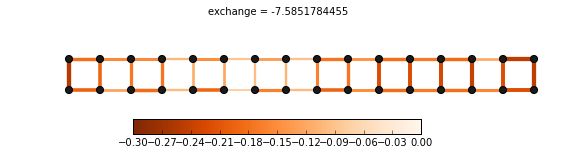

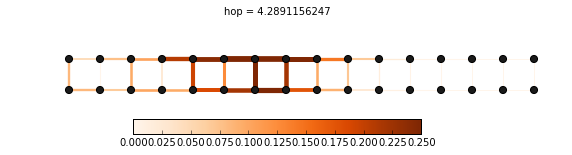

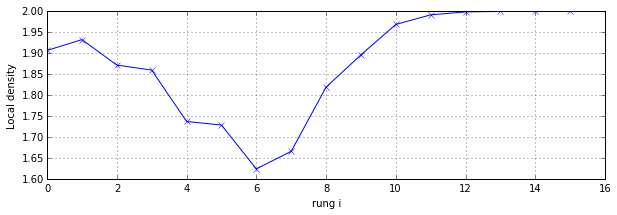

Energy =  -11.8939132318


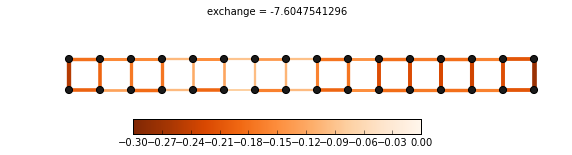

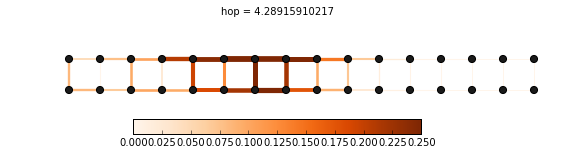

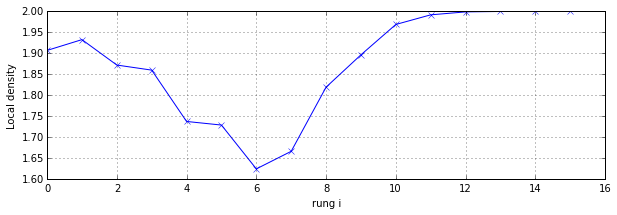

Energy =  -11.8939150984


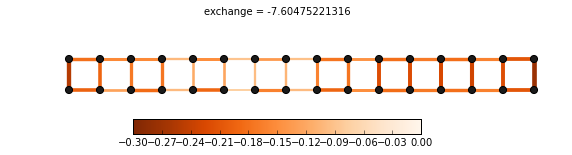

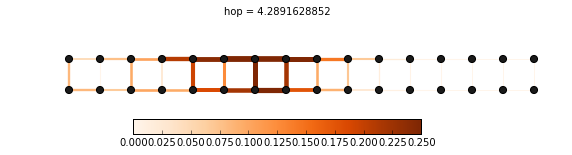

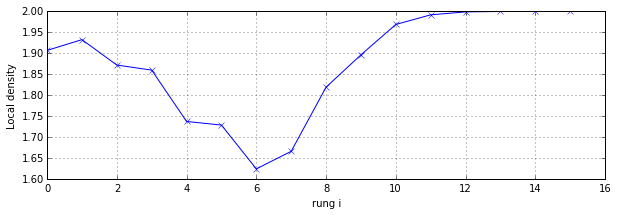

Energy =  -11.8939150984


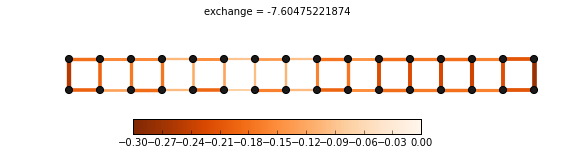

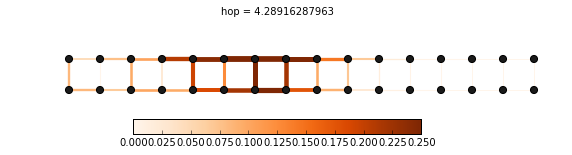

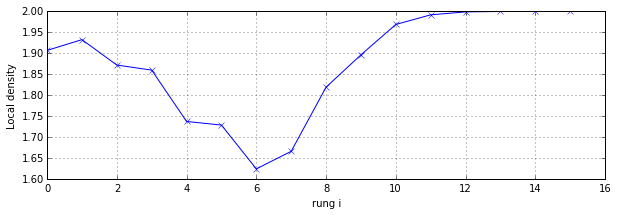

Energy =  -11.8939150984


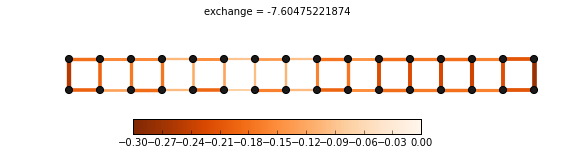

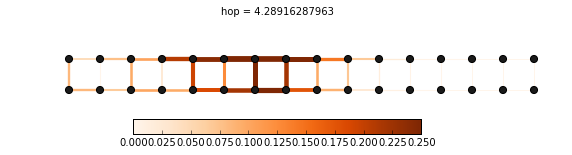

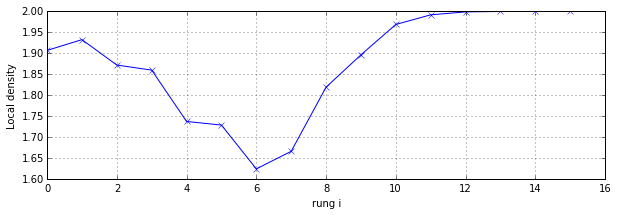

Energy =  -11.8939150984


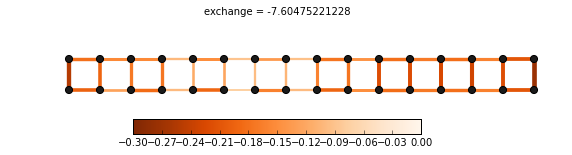

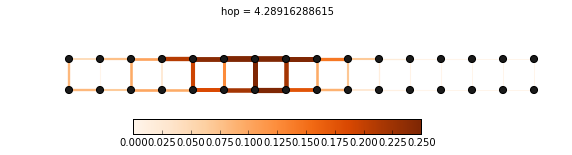

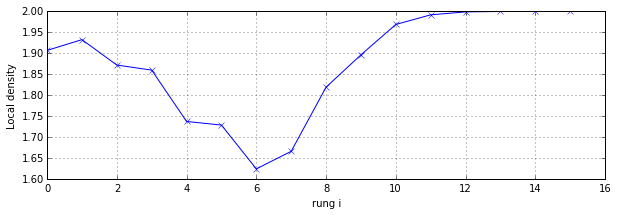

Energy =  -11.8939152235


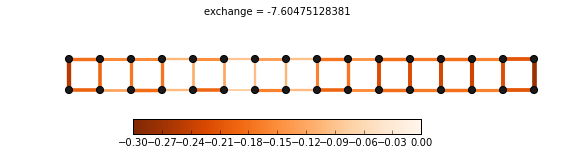

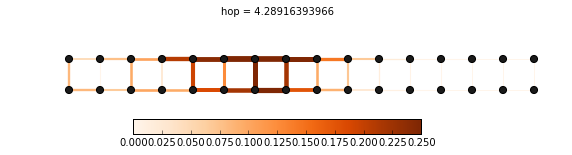

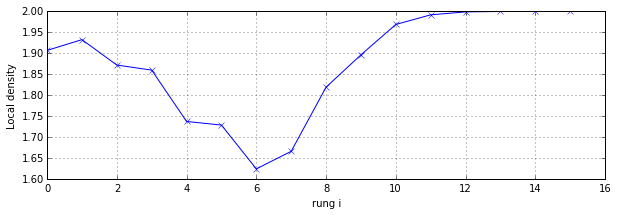

In [22]:
## Plot results at all iterations

def load_and_plot(fname, title):
    data = pyalps.loadEigenstateMeasurements([fname], what=['Energy', 'exchange', 'hop', 'Local density'])

    display(HTML("<h2>{}</h2>".format(title))) 
    analyze(data)

def iteration_fname(i):
    base = '/Volumes/alps/phys.ethz.ch/dolfim/LatticeMG/manual_runs/corej/L8M800M800/full_iter.{:02d}/iter.out.res.h5'
    return base.format(i)

load_and_plot('/Volumes/alps/phys.ethz.ch/dolfim/LatticeMG/manual_runs/corej/L8M800M800/meas.initfull.res.h5',
              'Initial state CORE')

for i in range(1,35):
    load_and_plot(iteration_fname(i), 'Iteration {}'.format(i))